# Notebook by Suryanarayan.B (CB.EN.U4CSE19056)

## Question 1

#### 1) MLP Model

In [143]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [144]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

In [145]:
X_train.shape

(60000, 28, 28)

In [146]:
X_test.shape

(10000, 28, 28)

In [147]:
Y_train.shape

(60000,)

In [148]:
Y_test.shape

(10000,)

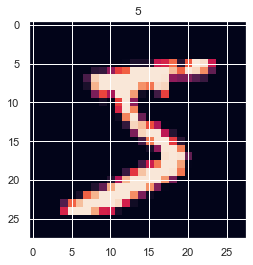

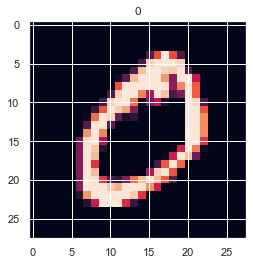

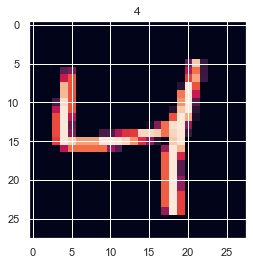

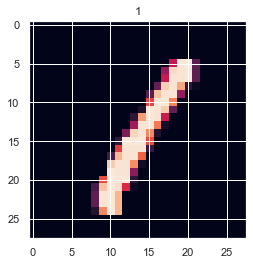

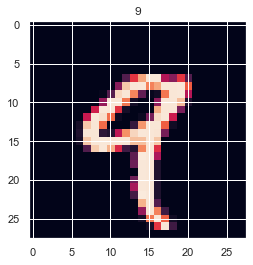

In [149]:
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.show()

## Printing the shape

In [150]:
print(X_train[0].shape)
print(X_train.shape)

(28, 28)
(60000, 28, 28)


## Reshaping the data

In [151]:
X_train=X_train.reshape(X_train.shape[0],-1)

In [152]:
X_test=X_test.reshape(X_test.shape[0],-1)

## One hot encoding

In [153]:
Y_train=to_categorical(Y_train)

In [154]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [155]:
Y_test=to_categorical(Y_test)

In [156]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Printing Shapes of train and test

In [157]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras import optimizers

### Here we use 3 hidden layers with 50 neurons and 4 batch normal function after each dense layer and 4 Dropout function after each activation layer.

### Here the optimizer used is adam , kernel_initializer is he_normal and activation function is sigmoid

In [159]:
def in_model(initializer='he_normal'):
    model=Sequential()
    model.add(Dense(50, input_shape = (784,),kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(10,kernel_initializer=initializer))
    model.add(Activation('softmax'))

    ad = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = ad, loss = "categorical_crossentropy", metrics = ['accuracy'])
    return model


In [160]:
model=in_model()


In [161]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 50)                39250     
_________________________________________________________________
batch_normalization_56 (Batc (None, 50)                200       
_________________________________________________________________
activation_70 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_57 (Batc (None, 50)                200       
_________________________________________________________________
activation_71 (Activation)   (None, 50)              

In [162]:
from tensorflow.keras.callbacks import Callback

## Custom callback function
### This function stops the training once accuracy reaches 90% 

In [163]:
class TerminateOnBaseline(Callback):
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

In [164]:
callback = [TerminateOnBaseline()]

### Initializing the Filepath to save the Checkpoint and initializing checkpoint

In [166]:
checkpoint_filepath = 'C:\\Users\\Surya\\Desktop\\College\\6th Semester\\Neural Networks and Deep Learning\\Lab Assignments\\Lab-4\\model1.h5'

In [168]:
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='accuracy',
    mode='auto',
    save_best_only=True)

### Training the model

In [169]:
train1=model.fit(X_train,Y_train,validation_split=0.3,epochs=100,callbacks=[callback,checkpoint1],verbose=1)

Epoch 1/100
1313/1313 [==============================] - 22s 16ms/step - loss: 1.3036 - accuracy: 0.5851 - val_loss: 0.4848 - val_accuracy: 0.8736
Epoch 2/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.7186 - accuracy: 0.7843 - val_loss: 0.3383 - val_accuracy: 0.9032
Epoch 3/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5834 - accuracy: 0.8268 - val_loss: 0.2828 - val_accuracy: 0.9160
Epoch 4/100
1313/1313 [==============================] - 22s 16ms/step - loss: 0.5191 - accuracy: 0.8463 - val_loss: 0.2545 - val_accuracy: 0.9253
Epoch 5/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4736 - accuracy: 0.8615 - val_loss: 0.2360 - val_accuracy: 0.9314
Epoch 6/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4397 - accuracy: 0.8717 - val_loss: 0.2103 - val_accuracy: 0.9379
Epoch 7/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4056 - accuracy: 0.8809 - val_loss: 0

### Loading the weights into the model from model1.h5

In [170]:
modelmn1=in_model()

In [171]:
modelmn1.load_weights('model1.h5')

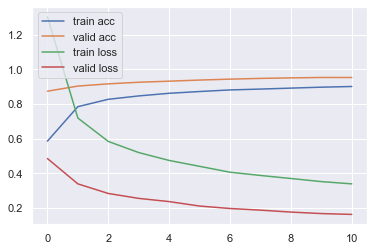

In [172]:
plt.plot(train1.history['accuracy' ])
plt.plot(train1.history['val_accuracy'])
plt.plot(train1.history['loss'])
plt.plot(train1.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

### Printing the accuracy

In [173]:
model_out1=model.evaluate(X_test,Y_test)
print(f"Test Accuracy is: {model_out1[1]*100}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.1506 - accuracy: 0.9546
Test Accuracy is: 95.45999765396118%


In [174]:
print(model.metrics_names) 
print(model_out1)

['loss', 'accuracy']
[0.1505972146987915, 0.9545999765396118]


### Printing the accuracy from model1.h5

In [176]:
model_outmn1=modelmn1.evaluate(X_test,Y_test)
print(f"Test Accuracy is: {model_outmn1[1]*100}%")


313/313 [==============================] - 2s 6ms/step - loss: 0.1506 - accuracy: 0.9546
Test Accuracy is: 95.45999765396118%


### Printing Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
def print_conf(model):
    labels=Y_test
    y_pred=model.predict(X_test)
    diffmatrix = confusion_matrix(labels.argmax(axis=1), y_pred.argmax(axis=1))
    return diffmatrix

In [95]:
cm1=print_conf(model)

In [96]:
import seaborn as sns

In [97]:
cm1

array([[ 960,    0,    0,    2,    1,    2,   13,    1,    1,    0],
       [   0, 1122,    2,    3,    1,    0,    4,    1,    2,    0],
       [   4,    1,  986,    9,    9,    0,    5,    5,   12,    1],
       [   1,    0,   12,  968,    2,    6,    0,   11,    7,    3],
       [   0,    0,    2,    0,  960,    0,   10,    1,    1,    8],
       [   6,    1,    1,   36,    5,  807,   14,    4,   13,    5],
       [   7,    4,    0,    1,    8,    4,  930,    0,    4,    0],
       [   1,   11,   14,    4,    8,    1,    0,  960,    2,   27],
       [   6,    9,    4,    7,    8,    6,    6,    5,  918,    5],
       [   3,    4,    0,    7,   34,   10,    0,    5,    4,  942]],
      dtype=int64)

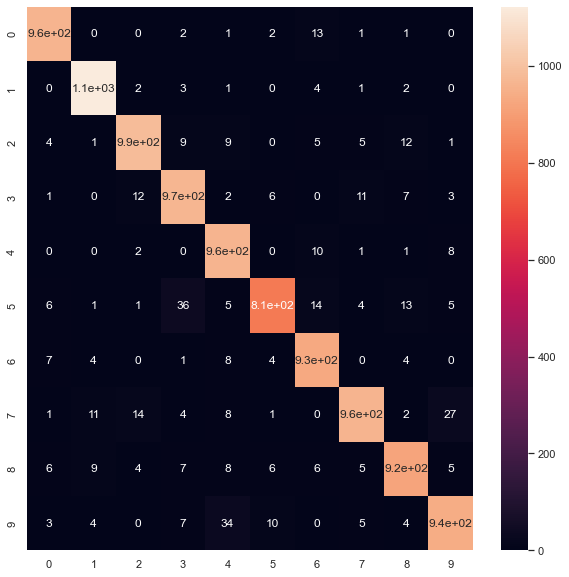

In [98]:
def matrix(cm):
    fig, ax = plt.subplots(figsize=(10,10))       
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, ax=ax)

matrix(cm1)

#### 2) Ensemble Learning model using Voting Classifier

In [99]:
y_train=np.argmax(Y_train,axis=1)
y_test=np.argmax(Y_test,axis=1)

In [100]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [101]:
callback1 = [TerminateOnBaseline()]

In [102]:
checkpoint_filepath1 = 'C:\\Users\\Surya\\Desktop\\College\\6th Semester\\Neural Networks and Deep Learning\\Lab Assignments\\Lab-4\\emodel.h5'

In [103]:
checkpoint2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    save_weights_only=False,
    monitor='accuracy',
    mode='auto',
    save_best_only=True)

### Initializing 3 models for Ensemble Learning

In [104]:
emodel1=KerasClassifier(build_fn=in_model,epochs=100,validation_split=0.3,callbacks=[callback1,checkpoint2],verbose=1)
emodel2=KerasClassifier(build_fn=in_model,epochs=100,validation_split=0.3,callbacks=[callback1,checkpoint2],verbose=1)
emodel3=KerasClassifier(build_fn=in_model,epochs=100,validation_split=0.3,callbacks=[callback1,checkpoint2],verbose=1)
emodel1._estimator_type="classifier"
emodel2._estimator_type="classifier"
emodel3._estimator_type="classifier"

In [105]:
ensemble=VotingClassifier(estimators=[('model1',emodel1),('model2',emodel2),('model3',emodel3)],voting='soft')

In [106]:
etrain=ensemble.fit(X_train,y_train)

Epoch 1/100
1313/1313 [==============================] - 26s 19ms/step - loss: 1.2967 - accuracy: 0.5851 - val_loss: 0.4560 - val_accuracy: 0.8869
Epoch 2/100
1313/1313 [==============================] - 27s 20ms/step - loss: 0.7083 - accuracy: 0.7874 - val_loss: 0.3385 - val_accuracy: 0.9021
Epoch 3/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5812 - accuracy: 0.8276 - val_loss: 0.2803 - val_accuracy: 0.9193
Epoch 4/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5152 - accuracy: 0.8472 - val_loss: 0.2483 - val_accuracy: 0.9267
Epoch 5/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.4670 - accuracy: 0.8619 - val_loss: 0.2209 - val_accuracy: 0.9371
Epoch 6/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.4400 - accuracy: 0.8700 - val_loss: 0.2066 - val_accuracy: 0.9378
Epoch 7/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.4042 - accuracy: 0.8813 - val_loss: 0

In [107]:
Y_pred1 = ensemble.predict(X_test)

313/313 [==============================] - 1s 3ms/step


### Printing the accuracy

In [108]:
ex1=accuracy_score(y_test,Y_pred1)

In [109]:
print("Test Accuracy is :", ex1*100 ," %")

Test Accuracy is : 95.97  %


In [110]:
model13=in_model()

### Loading the model from emodel.h5 and printing the accuracy

In [111]:
model13.load_weights('emodel.h5')

In [112]:
model_out12=model13.evaluate(X_test,Y_test)
print(f"Test Accuracy is: {model_out12[1]*100}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.1504 - accuracy: 0.9555
Test Accuracy is: 95.55000066757202%


### Printing the confusion matrix

In [113]:
cm2=confusion_matrix(y_test, Y_pred1)

In [114]:
cm2

array([[ 969,    0,    1,    1,    1,    2,    4,    1,    1,    0],
       [   0, 1122,    3,    3,    0,    1,    3,    1,    2,    0],
       [   6,    1,  995,    6,    7,    0,    2,    6,    9,    0],
       [   0,    1,   12,  971,    1,    7,    0,   11,    7,    0],
       [   1,    0,    4,    0,  957,    0,    5,    1,    2,   12],
       [  10,    1,    2,   22,    3,  827,    8,    3,   10,    6],
       [   8,    3,    0,    1,    9,    5,  929,    0,    3,    0],
       [   3,   17,   15,    5,    8,    0,    0,  969,    0,   11],
       [   6,    4,    3,    9,    6,    9,    6,    5,  922,    4],
       [   9,    7,    0,    8,   30,   10,    0,    6,    3,  936]],
      dtype=int64)

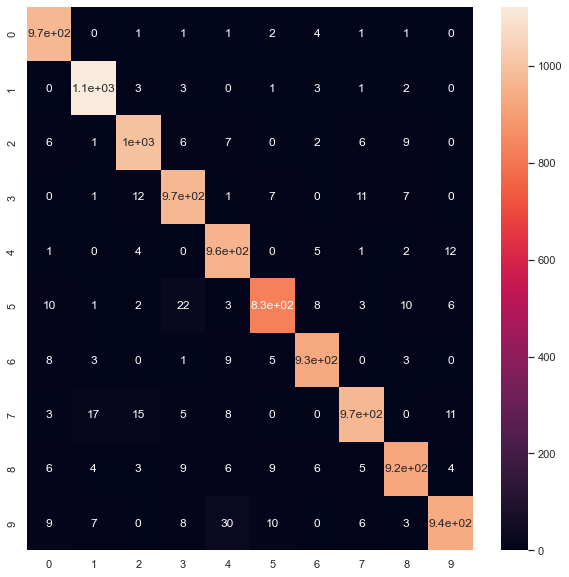

In [115]:
matrix(cm2)

## Question 2

### 1) MLP Model
### Here the dataset used is https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

In [182]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

In [183]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Splitting the data

In [184]:
X=df.drop('unacc',axis=1)
X

,vhigh,vhigh.1,2,2.1,small,low
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [185]:
Y=df.iloc[:,-1]
Y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: unacc, Length: 1727, dtype: object

### One-Hot Encoding

In [186]:
X=pd.get_dummies(X)

In [187]:
X=X.values

In [188]:
Y=pd.get_dummies(Y)

In [189]:
Y=Y.values

In [190]:
print(X.shape,Y.shape)

(1727, 21) (1727, 4)


### Train-test-split

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [193]:
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (1157, 21)
Test shape (570, 21)
(1157, 4)
(570, 4)


In [194]:
X_train=np.asarray(X_train).astype(float)

y_train=np.asarray(y_train).astype(float)

### Initializing the NN Model

In [195]:
def car_model(initializer='he_normal'):
    model=Sequential()
    model.add(Dense(50, input_shape = (21,),kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer=initializer))
    model.add(Activation('softmax'))

    ad = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = ad, loss = "categorical_crossentropy", metrics = ['accuracy'])
    return model

In [196]:
cmodel1=car_model()

In [197]:
cmodel1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 50)                1100      
_________________________________________________________________
batch_normalization_68 (Batc (None, 50)                200       
_________________________________________________________________
activation_85 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_69 (Batc (None, 50)                200       
_________________________________________________________________
activation_86 (Activation)   (None, 50)              

### Call back function

In [198]:
callback_c1 = [TerminateOnBaseline()]

In [199]:
checkpoint_filepath2 = 'C:\\Users\\Surya\\Desktop\\College\\6th Semester\\Neural Networks and Deep Learning\\Lab Assignments\\Lab-4\\car1.h5'
checkpoint3 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_weights_only=False,
    monitor='accuracy',
    mode='auto',
    save_best_only=True)


### Training the model

In [200]:
ctrain1=cmodel1.fit(X_train,y_train,validation_split=0.3,epochs=100,callbacks=[callback_c1,checkpoint3],verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 28ms/step - loss: 0.9817 - accuracy: 0.6675 - val_loss: 0.9348 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 0s 19ms/step - loss: 0.8155 - accuracy: 0.7132 - val_loss: 0.9367 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 0s 18ms/step - loss: 0.7681 - accuracy: 0.7194 - val_loss: 0.9187 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 0s 18ms/step - loss: 0.7185 - accuracy: 0.7244 - val_loss: 0.8969 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 18ms/step - loss: 0.6863 - accuracy: 0.7244 - val_loss: 0.8687 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 0.6175 - accuracy: 0.7491 - val_loss: 0.8110 - val_accuracy: 0.6667
Epoch 7/100
26/26 [==============================] - 0s 17ms/step - loss: 0.5834 - accuracy: 0.7738 - val_loss: 0.7579 - val_accuracy: 0.6667
Epoch 

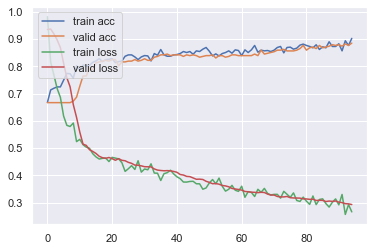

In [201]:
plt.plot(ctrain1.history['accuracy' ])
plt.plot(ctrain1.history['val_accuracy'])
plt.plot(ctrain1.history['loss'])
plt.plot(ctrain1.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

### Test Accuracy

In [202]:
cmodel_out1=cmodel1.evaluate(X_test,y_test)
print(f"Test Accuracy is: {cmodel_out1[1]*100}%")

18/18 [==============================] - 0s 8ms/step - loss: 0.2250 - accuracy: 0.9053
Test Accuracy is: 90.52631855010986%


### Loading the weights into the model from car1.h5

In [204]:
model1car=car_model()

In [205]:
model1car.load_weights('car1.h5')

In [206]:
car1model_out1=model1car.evaluate(X_test,y_test)
print(f"Test Accuracy is: {car1model_out1[1]*100}%")

18/18 [==============================] - 0s 9ms/step - loss: 0.2250 - accuracy: 0.9053
Test Accuracy is: 90.52631855010986%


### Print Confusion Matrix

In [207]:
def cprint_conf(model):
    labels=y_test
    y_pred=model.predict(X_test)
    diffmatrix = confusion_matrix(labels.argmax(axis=1), y_pred.argmax(axis=1))
    return diffmatrix

In [208]:
car_cm1=cprint_conf(cmodel1)

In [209]:
car_cm1

array([[113,   3,  11,   0],
       [  3,  15,   0,   0],
       [ 11,   0, 388,   0],
       [  8,  18,   0,   0]], dtype=int64)

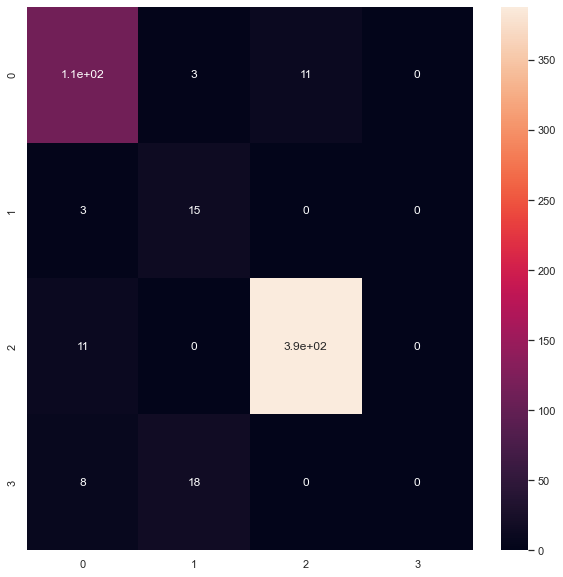

In [210]:
matrix(car_cm1)

### 2) Ensemble Learning model using Voting Classifier

In [211]:
y_train=np.argmax(y_train,axis=1)

In [212]:
y_train

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [213]:
y_test=np.argmax(y_test,axis=1)
y_test

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 3, 0, 0, 2, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 1, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 3, 0, 0, 2, 3, 0, 2, 3, 2, 0, 0,
       3, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       3, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0,
       2, 1, 3, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0,

In [214]:
ecallback1 = [TerminateOnBaseline()]

In [215]:
checkpoint_filepath3 = 'C:\\Users\\Surya\\Desktop\\College\\6th Semester\\Neural Networks and Deep Learning\\Lab Assignments\\Lab-4\\ecar.h5'
checkpoint4 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath3,
    save_weights_only=False,
    monitor='accuracy',
    mode='auto',
    save_best_only=True)

### Intializing 3 models for Ensemble learning

In [216]:
emodel7=KerasClassifier(build_fn=car_model,epochs=100,validation_split=0.3,callbacks=[ecallback1,checkpoint4],verbose=1)
emodel8=KerasClassifier(build_fn=car_model,epochs=100,validation_split=0.3,callbacks=[ecallback1,checkpoint4],verbose=1)
emodel9=KerasClassifier(build_fn=car_model,epochs=100,validation_split=0.3,callbacks=[ecallback1,checkpoint4],verbose=1)
emodel7._estimator_type="classifier"
emodel8._estimator_type="classifier"
emodel9._estimator_type="classifier"

In [217]:
ensemble3=VotingClassifier(estimators=[('model1',emodel7),('model2',emodel8),('model3',emodel9)],voting='soft')

In [218]:
etrain4=ensemble3.fit(X_train,y_train)

Epoch 1/100
26/26 [==============================] - 2s 34ms/step - loss: 1.3751 - accuracy: 0.3004 - val_loss: 1.1392 - val_accuracy: 0.6667
Epoch 2/100
26/26 [==============================] - 1s 20ms/step - loss: 0.9543 - accuracy: 0.6625 - val_loss: 0.9548 - val_accuracy: 0.6667
Epoch 3/100
26/26 [==============================] - 0s 19ms/step - loss: 0.8112 - accuracy: 0.7070 - val_loss: 0.9001 - val_accuracy: 0.6667
Epoch 4/100
26/26 [==============================] - 1s 20ms/step - loss: 0.7469 - accuracy: 0.7231 - val_loss: 0.8534 - val_accuracy: 0.6667
Epoch 5/100
26/26 [==============================] - 0s 18ms/step - loss: 0.7020 - accuracy: 0.7268 - val_loss: 0.7971 - val_accuracy: 0.6667
Epoch 6/100
26/26 [==============================] - 0s 18ms/step - loss: 0.6506 - accuracy: 0.7590 - val_loss: 0.7352 - val_accuracy: 0.6667
Epoch 7/100
26/26 [==============================] - 1s 20ms/step - loss: 0.6291 - accuracy: 0.7454 - val_loss: 0.6668 - val_accuracy: 0.6695
Epoch 

In [219]:
y_pred = ensemble3.predict(X_test)

18/18 [==============================] - 0s 3ms/step


### Test Accuracy

In [220]:
x=accuracy_score(y_test,y_pred)

In [221]:
print("Test Accuracy is :", x*100 ," %")

Test Accuracy is : 91.05263157894737  %


### Loading the weights into the model from ecar.h5

In [223]:
emodel1car=car_model()
emodel1car.load_weights('ecar.h5')

### Confusion Matrix

In [228]:
ecm=confusion_matrix(y_test, y_pred)

In [229]:
ecm

array([[118,   2,   7,   0],
       [  3,  15,   0,   0],
       [ 13,   0, 386,   0],
       [  8,  18,   0,   0]], dtype=int64)

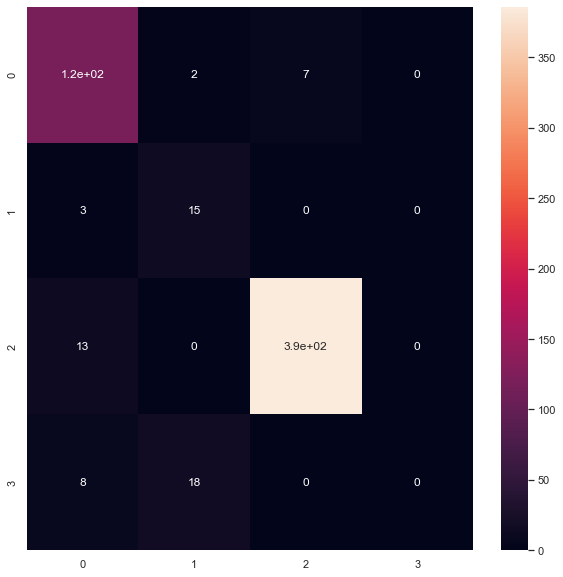

In [230]:
matrix(ecm)

# Inference:

### From the above experiments we infer that ensemble model gives slight or same accuracy compared to baseline MLP model 